In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats as sms
import numpy as np

In [2]:
data = pd.read_excel('v2.0 for Sanya - monthly - cpi and exp cpi inflation.xlsx', index_col = 'Date')
data = data.loc['2003':]

In [3]:
tips_data = pd.read_csv('T5YIE.csv', index_col = 'DATE')
tips_data['T5YIE'] = tips_data['T5YIE'].replace('.', np.nan).astype(float) / 100
# tips_data = tips_data.diff(1).iloc[1:].dropna()
tips_data.index = pd.to_datetime(tips_data.index)

In [4]:
data = pd.concat([data, tips_data], axis = 1, join = 'inner').drop(['Month', 'Year'], axis = 1)
data = data.diff(1).iloc[1:]

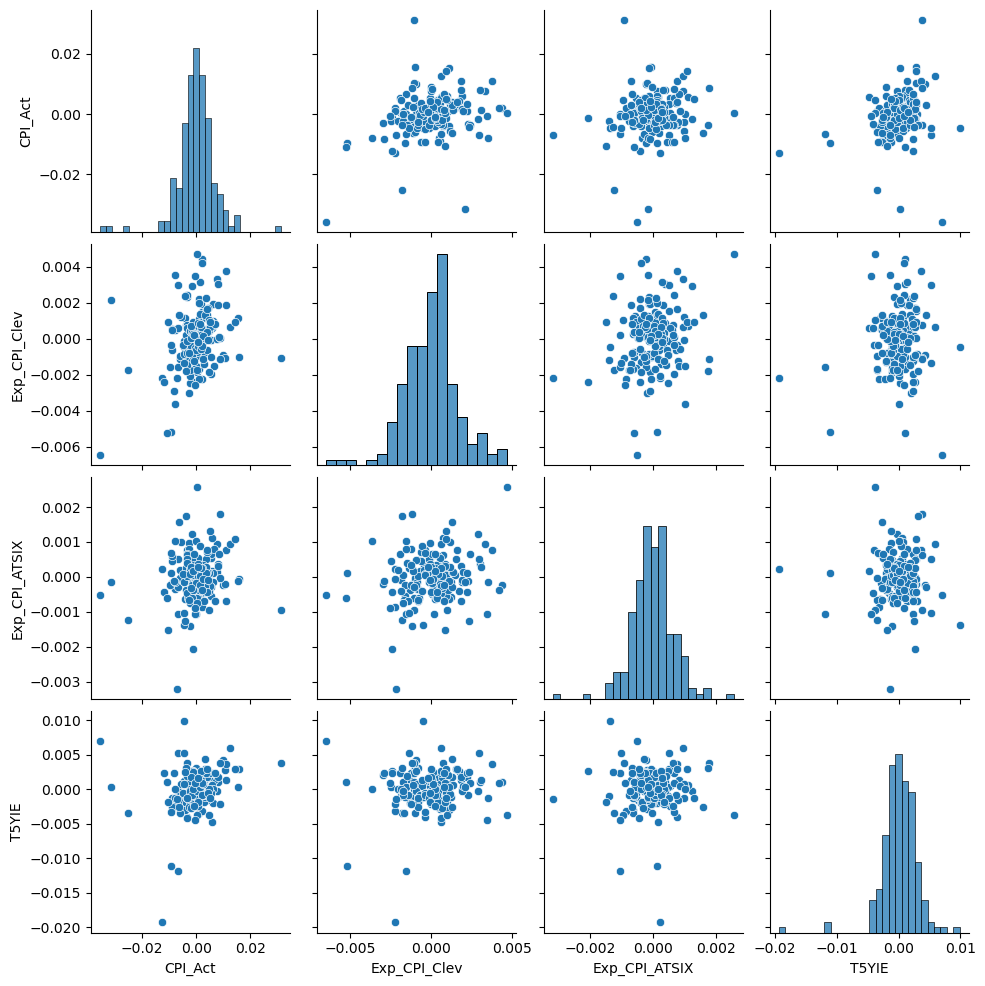

In [5]:
import seaborn as sns

sns.pairplot(data)

In [6]:
y = data['T5YIE'].dropna()

x_names_list = data.columns.tolist()
x_names_list.remove('T10YIE')


models_list = []
for x_name in x_names_list:
    
    x = sm.add_constant(data[x_name].loc[y.index])
    
    model = sm.OLS(y, x).fit(cov_type = 'HC1')
    
    models_list.append(model)
    

ValueError: list.remove(x): x not in list

In [ ]:
for model in models_list:
    print(model.summary())
    print('\n\n\n')

In [7]:
infl_type = 'T5YIE'
Y = data[infl_type].dropna()

x_names_list = data.columns.tolist()
x_names_list.remove(infl_type)


models_list = []
for x_name in x_names_list:
    
    x = sm.add_constant(data[x_name]).dropna()
    x = x.loc[[date for date in x.index if date in y.index]]
    
    y = Y.loc[x.index]
    
    model = sm.OLS(y, x).fit(cov_type = 'HC1')
    
    models_list.append(model)
    

In [8]:
for model in models_list:
    print(model.summary())
    print('\n\n\n')

                            OLS Regression Results                            
Dep. Variable:                  T5YIE   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.889
Date:                Sat, 11 May 2024   Prob (F-statistic):             0.0910
Time:                        21:46:16   Log-Likelihood:                 786.18
No. Observations:                 177   AIC:                            -1568.
Df Residuals:                     175   BIC:                            -1562.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.483      0.6